<a href="https://colab.research.google.com/github/anamilanezi/ebac-dados/blob/main/exercicios/em14-visualizacao-de-dados-I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

## Insights

A maioria das amostras desse conjunto de dados se concentra na faixa de preço entre \$326,00 (valor mínimo) à  \$5324,00 havendo a predominância de diamantes com o corte "Ideal", que dentro da escala representa o melhor corte. A média de preço dos diamantes com corte "Fair", que dentro da escala representam os de menor qualidade, pode alcançar o mesmo patamar de diamantes "Ideal" e "Premium", isso significa que, sozinho, o tipo de corte não pode explicar o preço de um diamante.

Considerando tipo de corte e coloração, os diamantes com corte "Premium" e cor "I" e "J" apresentam a maior média de preço entre todos os tipos de corte. Os diamantes com corte "Fair" são os que mais se aproximam da média de preços dos diamantes "Premium" e os diamantes de corte "Ideal" apresentam a menor média especialmente para as colorações "D" e "E".

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = sns.load_dataset("diamonds")
ordem_corte = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

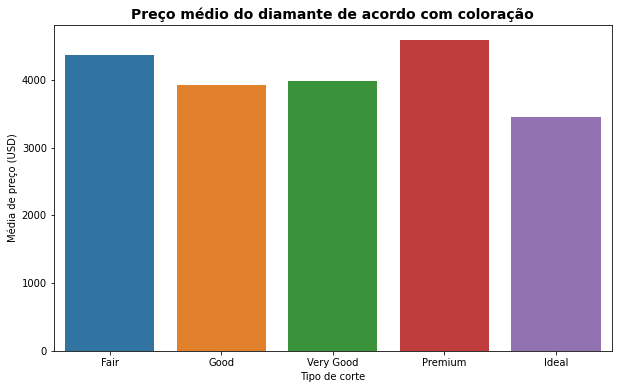

In [11]:
dmd = sns.barplot(data=data, x="cut", y="price", ci=None, order=ordem_corte)
dmd.set_title("Preço médio do diamante de acordo com coloração", fontsize=14, fontweight="bold");
dmd.set(xlabel="Tipo de corte", ylabel="Média de preço (USD)")
dmd.figure.set_size_inches(10,6)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


Visto que X, Y e Z são variáveis que representam as três dimensões do diamante, optei por remover as ocorrências com valores nulos da análise.


In [13]:
data.query("x == 0 or y == 0 or x == 0")

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [14]:
data = data.drop(data[data['x'] == 0].index)
data = data.drop(data[data['y'] == 0].index)
data = data.drop(data[data['z'] == 0].index)

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80


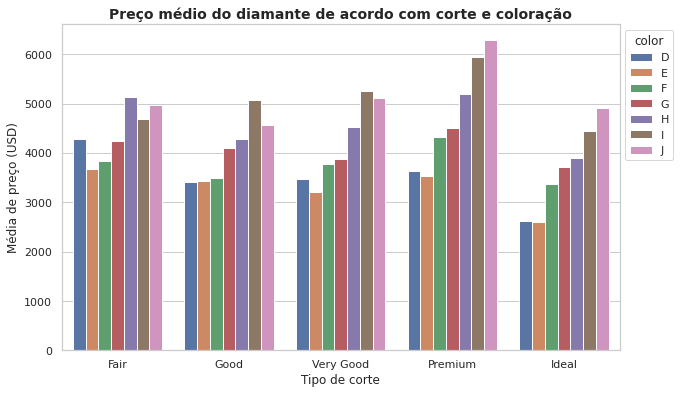

In [24]:

sns.set_theme(style="whitegrid")
diamonds = sns.barplot(data=data, x="cut", y="price", hue="color", order=ordem_corte, ci=None, errwidth=0)
sns.move_legend(diamonds, "upper left", bbox_to_anchor=(1, 1))
diamonds.set_title("Preço médio do diamante de acordo com corte e coloração", fontsize=14, fontweight="bold");
diamonds.set(xlabel="Tipo de corte", ylabel="Média de preço (USD)")
diamonds.figure.set_size_inches(10,6)


# Coloração H apresenta valores semelhantes entre corte "fair" e "premium"
# Coloração D tem maior valor para corte "fair"

In [ ]:
price_carat = sns.relplot(data=data, y='price', x='carat', hue='cut', hue_order=ordem_corte, alpha=0.6)
price_carat.set(title="Gráfico 1: Relação entre preço (USD) e peso (quilates) dos diamantes", xlabel="Peso (quilates)", ylabel="Preço (USD)", xlim=(0, 6), ylim=(0, 19000))
price_carat.legend.set_title("Tipo de corte", prop={"size": 10, "weight": "bold"});
price_carat.fig.set_size_inches(12, 6)


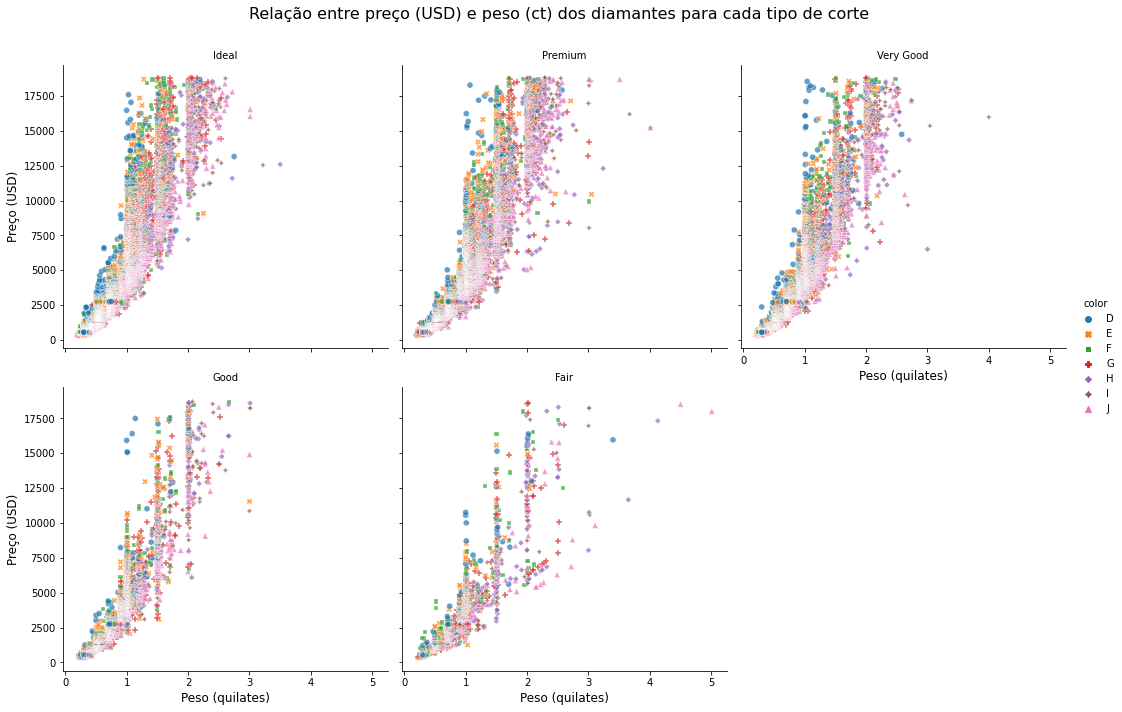

In [17]:
grafico = sns.relplot(data=data, y='price', x='carat', style="color", hue="color", col="cut", col_wrap=3, alpha=0.7)
grafico.fig.subplots_adjust(top=.9)
grafico.fig.suptitle('Relação entre preço (USD) e peso (ct) dos diamantes para cada tipo de corte', fontsize=16)
grafico.set_xlabels("Peso (quilates)", fontsize=12);
grafico.set_ylabels("Preço (USD)", fontsize=12)
grafico.set_titles(col_template="{col_name}")


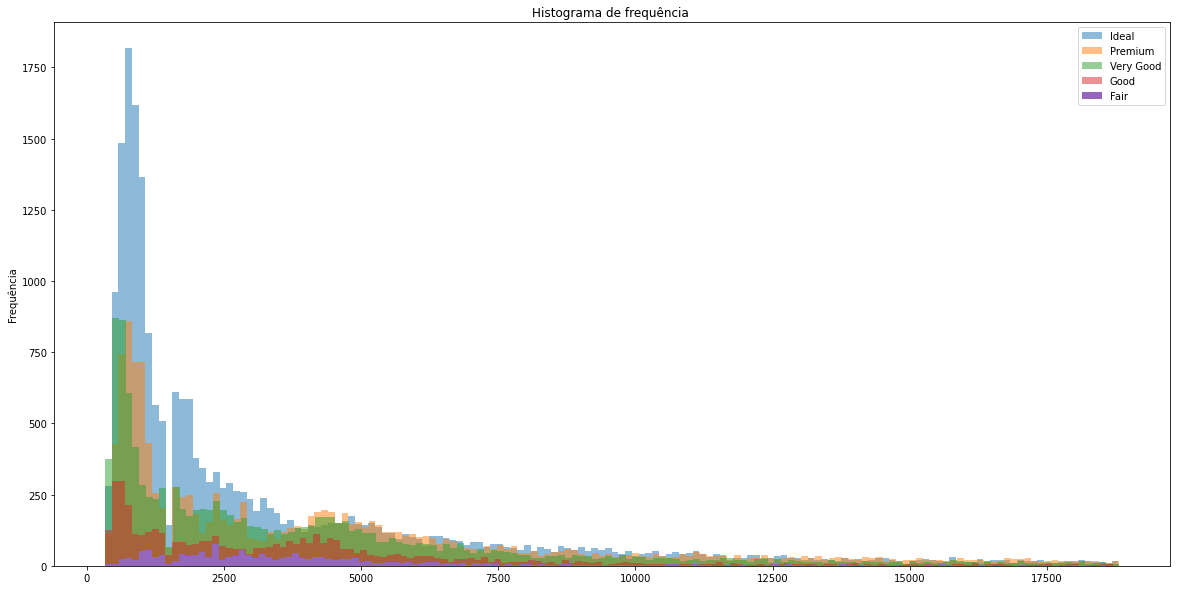

In [18]:

x1 = data.loc[data.cut=='Fair', 'price']
x2 = data.loc[data.cut=='Good', 'price']
x3 = data.loc[data.cut=='Very Good', 'price']
x4 = data.loc[data.cut=='Premium', 'price']
x5 = data.loc[data.cut=='Ideal', 'price']

kwargs = dict(alpha=0.5, bins=150)
plt.figure(figsize=(20,10))
plt.hist(x5, **kwargs, label='Ideal')
plt.hist(x4, **kwargs, label='Premium')
plt.hist(x3, **kwargs, label='Very Good')
plt.hist(x2, **kwargs, label='Good')
plt.hist(x1, bins=150, label='Fair')

plt.gca().set(title='Histograma de frequência ', ylabel='Frequência')

plt.legend();

[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Preço')]

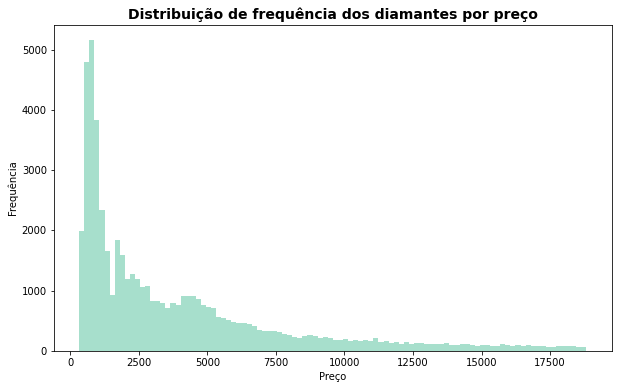

In [ ]:
# Remover a borda
sns.set_context(rc = {'patch.linewidth': 0.0})
#histograma_preco = sns.histplot(data['price'], bins=50, color="#50c19a")
histograma_preco = sns.histplot(data=data, x="price", bins=100, color="#50c19a", alpha=0.5)
histograma_preco.figure.set_size_inches(10,6)
histograma_preco.set_title("Distribuição de frequência dos diamantes por preço", fontsize=14, fontweight="bold");
histograma_preco.set(xlabel="Preço", ylabel="Frequência")

---

## 2\. Número de passageiros em dezembro por ano

# Insights:

O número de passageiros no mês de dezembro duplicou entre 1950 e 1956, com tendência contínua de crescimentos para esse mês ao longo dos anos. 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
# gráfico do exercício 2

flights = data.query("month == 'Dec'")
flights

,year,month,passengers
11,1949,Dec,118
23,1950,Dec,140
35,1951,Dec,166
47,1952,Dec,194
59,1953,Dec,201
71,1954,Dec,229
83,1955,Dec,278
95,1956,Dec,306
107,1957,Dec,336
119,1958,Dec,337


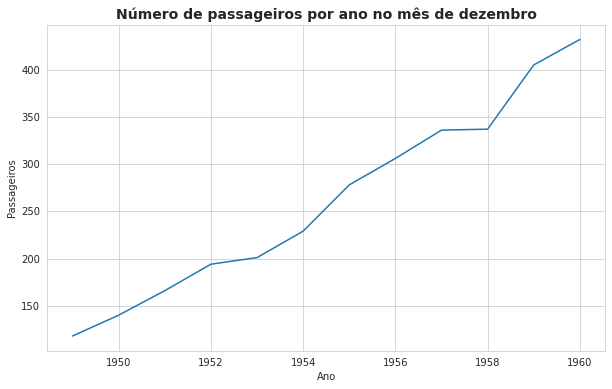

In [ ]:
with sns.axes_style('whitegrid'):
  pass_dezembro = sns.lineplot(data=flights, x="year", y="passengers", palette="pastel")
  pass_dezembro.set_title("Número de passageiros por ano no mês de dezembro", fontsize=14, fontweight="bold");
  pass_dezembro.set(xlabel="Ano", ylabel="Passageiros")
  pass_dezembro.figure.set_size_inches(10,6)



---

## 3\. Numero de passageiros por mês entre 1949 e 1959

# Insights:

A partir de 1949, cada ano superou o anterior em número de passageiros. Esse aumento foi aparentemente mais significativo entre os anos 1954 e 1956. Durante todos os anos da série é possível observar um aumento no número de passageiros a partir do mês de maio, atingindo o ápice entre julho e agosto. A partir daí, o número de passageiros volta a diminuir, com um leve aumento entre novembro e dezembro.

In [38]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [46]:
# gráfico do exercício 3

flights = data.query("1949 <= year < 1960")

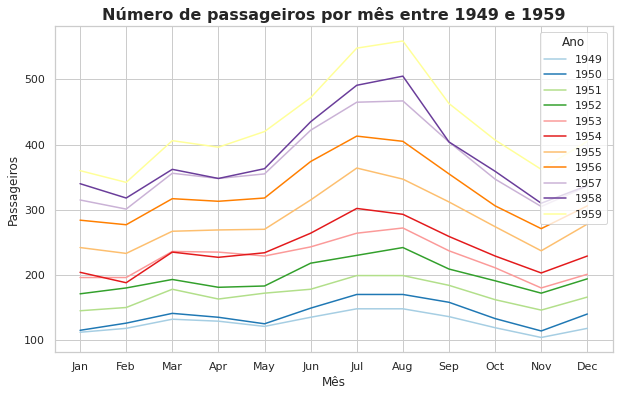

In [66]:
with sns.axes_style('whitegrid'):

  pass_mes = sns.lineplot(data=flights, x="month", y="passengers", hue='year', palette="Paired")
  pass_mes.set_title("Número de passageiros por mês entre 1949 e 1959", fontsize=16, fontweight="bold");
  pass_mes.set(xlabel="Mês", ylabel="Passageiros")
  pass_mes.get_legend().set_title("Ano");
  pass_mes.figure.set_size_inches(10,6)


---